## Loading the required libraries

In [95]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [96]:
# setting random seed as 42
tf.random.set_seed(42)


## Loading the CIFAR 10 Data



In [97]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

### Randomly sampling 20% of data from total training data

In [98]:
## using code block from https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison

# function to randomly sample 20% training data
np.random.seed(42)

def unison_shuffled_copies(a, b):
  """
  It takes input as two numpy arrays of same shape
  returns a shuffled arrays with 20% of randomly samples data
  """
  assert len(a) == len(b)
  p = np.random.permutation(int(len(a)*0.2))
  return a[p], b[p]

x_train,y_train = unison_shuffled_copies(x_train,y_train)


In [99]:
print("shape of shuffled training data is ",x_train.shape)
print("shape of shuffled training labels is", y_train.shape)

shape of shuffled training data is  (10000, 32, 32, 3)
shape of shuffled training labels is (10000, 1)


### Lets see distribution of classes in the dataset

In [100]:
# finding unique classes and corresponding counts
num_classes, num_count = np.unique(y_train, return_counts= True)
train_class_dict  = {"class":num_classes, "count":num_count}
train_class_dist = pd.DataFrame.from_dict(train_class_dict)

Text(0.5, 1.0, 'counts for each category')

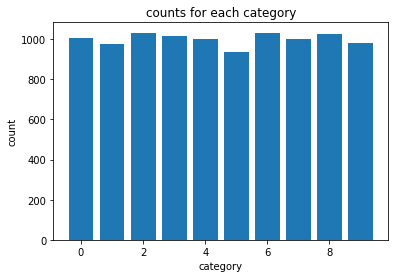

In [101]:
# plotting bar plots to see if we have sufficient number of examples of each class
plt.bar(train_class_dist["class"],train_class_dist["count"])
plt.xlabel("category")
plt.ylabel("count")
plt.title("counts for each category")

Thus we can say we have approximately 1000 examples of each of these classes

## Splitting the testing data into validation and testing data

In [102]:
## lets randomize the testing data first and then we will split it into 50-50 ratio for testing and validation set

def unison_shuffled_copies_full(a, b):
  """
  It takes input as two numpy arrays of same shape
  returns a shuffled arrays with of randomly samples data
  """
  assert len(a) == len(b)
  p = np.random.permutation(len(a))
  return a[p], b[p]

x_test,y_test = unison_shuffled_copies_full(x_test,y_test)


In [103]:
print("shape of shuffed x_test before splitting is ", x_test.shape)
print("shape of shuffled y_test before splitting is ", y_test.shape)


shape of shuffed x_test before splitting is  (10000, 32, 32, 3)
shape of shuffled y_test before splitting is  (10000, 1)


### Splitting test data into validation and train data

In [104]:
x_val = x_test[:5000,]
y_val = y_test[:5000]
x_test = x_test[5000:]
y_test = y_test[5000:]

In [105]:
print("shape of x_val is",x_val.shape)
print("shape of y_val is",y_val.shape)
print("shape of x_test is",x_test.shape)
print("shape of y_test is",y_test.shape)

shape of x_val is (5000, 32, 32, 3)
shape of y_val is (5000, 1)
shape of x_test is (5000, 32, 32, 3)
shape of y_test is (5000, 1)


## Preprocessing Dataset before training

#### Preprocessing the training features

In [106]:
### converting integer coded pixels to float values before training

x_train_p = x_train.astype('float32')
x_val_p = x_val.astype('float32')
x_test_p = x_test.astype('float32')

### Normalizing the pixel (0-1) values to faster convergence of neural network
x_train_p = x_train_p/255.0
x_val_p = x_val_p/255.0
x_test_p = x_test_p/255.0

### Converting labels to one hot encoded labels

In [107]:
y_train_p = to_categorical(y_train, num_classes=10)
y_val_p = to_categorical(y_val, num_classes=10)
y_test_p = to_categorical(y_test, num_classes=10)

In [108]:
print("shape of processed trained label matrix is ",y_train_p.shape)
print("shape of processed testing set label matrix is ",y_test_p.shape)
print("shape of processed validation label matrix is ",y_val_p.shape)

shape of processed trained label matrix is  (10000, 10)
shape of processed testing set label matrix is  (5000, 10)
shape of processed validation label matrix is  (5000, 10)


## Defining the model for part 1

### Base Model with 2 hidden one output and one input layer

In [109]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])

#### lets have a look at model architecture

In [110]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_43 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_44 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model

In [111]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
history_l3_n_512= model.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p), epochs=5,verbose=1, batch_size =32 )

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.0568 - accuracy: 0.2399 - val_loss: 1.9104 - val_accuracy: 0.3062
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8823 - accuracy: 0.3145 - val_loss: 1.9390 - val_accuracy: 0.2856
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8280 - accuracy: 0.3347 - val_loss: 1.8649 - val_accuracy: 0.3248
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.7838 - accuracy: 0.3500 - val_loss: 1.8654 - val_accuracy: 0.3234
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.7486 - accuracy: 0.3638 - val_loss: 1.7721 - val_accuracy: 0.3488


### Experimenting with MLP models

#### 4 layer network with 512 nodes

In [113]:
model_l4_n512 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])

In [114]:
model_l4_n512.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_47 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_48 (Dense)             (None, 10)                5130      
Total params: 2,103,818
Trainable params: 2,103,818
Non-trainable params: 0
_________________________________________________________________


In [115]:
model_l4_n512.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
history_l4_n_512= model_l4_n512.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p), epochs=5,verbose=1, batch_size =32  )

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.1135 - accuracy: 0.2059 - val_loss: 1.9780 - val_accuracy: 0.2638
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9464 - accuracy: 0.2756 - val_loss: 1.9733 - val_accuracy: 0.2740
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8914 - accuracy: 0.3009 - val_loss: 1.9118 - val_accuracy: 0.2940
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8525 - accuracy: 0.3166 - val_loss: 1.8530 - val_accuracy: 0.3212
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8305 - accuracy: 0.3215 - val_loss: 1.8400 - val_accuracy: 0.3344


#### 5 layer network with 512 nodes

In [117]:
model_l5_n512 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])

In [118]:
model_l5_n512.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_53 (Dense)             (None, 10)                5130      
Total params: 2,366,474
Trainable params: 2,366,474
Non-trainable params: 0
___________________________________________

In [119]:
model_l5_n512.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [120]:
history_l5_n_512=  model_l5_n512.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p), epochs=5,verbose=1, batch_size =32 )

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.1943 - accuracy: 0.1544 - val_loss: 2.1047 - val_accuracy: 0.1816
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 2.1026 - accuracy: 0.1751 - val_loss: 2.1693 - val_accuracy: 0.1792
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 2.0839 - accuracy: 0.1814 - val_loss: 2.1069 - val_accuracy: 0.1812
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 2.0697 - accuracy: 0.1881 - val_loss: 2.0266 - val_accuracy: 0.2182
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 2.0259 - accuracy: 0.2126 - val_loss: 1.9810 - val_accuracy: 0.2486


#### 3 layer network with 256 neurons

In [121]:
model_l3_n256 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])  

In [122]:
model_l3_n256.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [123]:
model_l3_n256.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [124]:
history_l3_n_256= model_l3_n256.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p),epochs=5,verbose=1, batch_size =32  )                                             

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.0552 - accuracy: 0.2396 - val_loss: 1.9203 - val_accuracy: 0.2994
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8891 - accuracy: 0.3153 - val_loss: 1.9077 - val_accuracy: 0.3086
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8390 - accuracy: 0.3333 - val_loss: 1.9273 - val_accuracy: 0.3056
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.7896 - accuracy: 0.3516 - val_loss: 1.8263 - val_accuracy: 0.3528
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.7644 - accuracy: 0.3561 - val_loss: 1.7890 - val_accuracy: 0.3364


#### 4 layer network with 256 neurons

In [125]:
model_l4_n256 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])  

In [126]:
model_l4_n256.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_58 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_59 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_60 (Dense)             (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


In [127]:
model_l4_n256.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [128]:
history_l4_n_256 = model_l4_n256.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p), epochs=5,verbose=1, batch_size =32  )                                             

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.1599 - accuracy: 0.1701 - val_loss: 2.0432 - val_accuracy: 0.2088
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9784 - accuracy: 0.2615 - val_loss: 1.9607 - val_accuracy: 0.2738
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9304 - accuracy: 0.2850 - val_loss: 2.0231 - val_accuracy: 0.2530
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8833 - accuracy: 0.3036 - val_loss: 1.8885 - val_accuracy: 0.2972
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8527 - accuracy: 0.3140 - val_loss: 1.8538 - val_accuracy: 0.3186


#### 5 layer network with 256 neurons

In [129]:
model_l5_n256 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])  

In [130]:
model_l5_n256.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_62 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_63 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_64 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                2570      
Total params: 986,634
Trainable params: 986,634
Non-trainable params: 0
_______________________________________________

In [131]:
model_l5_n256.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
history_l5_n_256 =model_l5_n256.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p), epochs=5,verbose=1, batch_size =32  )                                             

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.1676 - accuracy: 0.1604 - val_loss: 2.0704 - val_accuracy: 0.1866
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 2.0297 - accuracy: 0.2224 - val_loss: 2.0273 - val_accuracy: 0.2308
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9773 - accuracy: 0.2440 - val_loss: 2.0802 - val_accuracy: 0.2220
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9438 - accuracy: 0.2629 - val_loss: 1.9610 - val_accuracy: 0.2578
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9188 - accuracy: 0.2800 - val_loss: 1.9283 - val_accuracy: 0.2866


#### 3 layer network with 1024 neurons

In [133]:
model_l3_n1024 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])  

In [134]:
model_l3_n1024.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_67 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_68 (Dense)             (None, 10)                10250     
Total params: 4,206,602
Trainable params: 4,206,602
Non-trainable params: 0
_________________________________________________________________


In [135]:
model_l3_n1024.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [136]:
history_l3_n_1024 = model_l3_n1024.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p), epochs=5,verbose=1, batch_size =32  )                                             

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 2.1118 - accuracy: 0.2233 - val_loss: 1.9418 - val_accuracy: 0.2956
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9090 - accuracy: 0.3028 - val_loss: 1.9808 - val_accuracy: 0.2678
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8485 - accuracy: 0.3270 - val_loss: 1.8755 - val_accuracy: 0.3164
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.7980 - accuracy: 0.3448 - val_loss: 1.8532 - val_accuracy: 0.3270
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.7616 - accuracy: 0.3576 - val_loss: 1.7804 - val_accuracy: 0.3510


#### 4 layer network with 1024 neurons

In [137]:
model_l4_n1024 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])  

In [138]:
model_l4_n1024.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_70 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_71 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_72 (Dense)             (None, 10)                10250     
Total params: 5,256,202
Trainable params: 5,256,202
Non-trainable params: 0
_________________________________________________________________


In [139]:
model_l4_n1024.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
history_l4_n_1024 = model_l4_n1024.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p),epochs=5,verbose=1, batch_size =32  )                                             

Epoch 1/5
313/313 [==============================] - 1s 5ms/step - loss: 2.2012 - accuracy: 0.1664 - val_loss: 2.0279 - val_accuracy: 0.2280
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9952 - accuracy: 0.2522 - val_loss: 2.0171 - val_accuracy: 0.2654
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9241 - accuracy: 0.2809 - val_loss: 1.9286 - val_accuracy: 0.2876
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8823 - accuracy: 0.3050 - val_loss: 1.8890 - val_accuracy: 0.3008
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8483 - accuracy: 0.3116 - val_loss: 1.8790 - val_accuracy: 0.3164


#### 5 layer network with 1024 neurons

In [141]:
model_l5_n1024 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),    
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(1024, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])  

In [142]:
model_l5_n1024.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_74 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_75 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_76 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_77 (Dense)             (None, 10)                10250     
Total params: 6,305,802
Trainable params: 6,305,802
Non-trainable params: 0
___________________________________________

In [143]:
model_l5_n1024.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
history_l5_n_1024 = model_l5_n1024.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p),epochs=5,verbose=1, batch_size =32  )                                             

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 2.3139 - accuracy: 0.1305 - val_loss: 2.1715 - val_accuracy: 0.1660
Epoch 2/5
313/313 [==============================] - 1s 5ms/step - loss: 2.1455 - accuracy: 0.1640 - val_loss: 2.2569 - val_accuracy: 0.1704
Epoch 3/5
313/313 [==============================] - 1s 5ms/step - loss: 2.1194 - accuracy: 0.1790 - val_loss: 2.1571 - val_accuracy: 0.1808
Epoch 4/5
313/313 [==============================] - 1s 5ms/step - loss: 2.1143 - accuracy: 0.1728 - val_loss: 2.0849 - val_accuracy: 0.2062
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 2.0855 - accuracy: 0.1741 - val_loss: 2.0818 - val_accuracy: 0.1986


## CNN Model for part2

### CNN model 1

In [145]:
model_cnn1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu",  input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),      
    tf.keras.layers.Flatten(),                               
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])

In [146]:
model_cnn1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_20 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               25690624  
_________________________________________________________________
dense_79 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_80 (Dense)             (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
_________________________________________

In [147]:
model_cnn1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [148]:
history_cnn1 = model_cnn1.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p), epochs=5,verbose=1, batch_size =32 )

Epoch 1/5
313/313 [==============================] - 3s 9ms/step - loss: 1.8166 - accuracy: 0.3219 - val_loss: 1.5296 - val_accuracy: 0.4466
Epoch 2/5
313/313 [==============================] - 3s 8ms/step - loss: 1.4138 - accuracy: 0.4848 - val_loss: 1.5156 - val_accuracy: 0.4572
Epoch 3/5
313/313 [==============================] - 3s 8ms/step - loss: 1.1733 - accuracy: 0.5742 - val_loss: 1.4702 - val_accuracy: 0.4774
Epoch 4/5
313/313 [==============================] - 3s 8ms/step - loss: 0.8641 - accuracy: 0.7010 - val_loss: 1.3906 - val_accuracy: 0.5348
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.5109 - accuracy: 0.8280 - val_loss: 1.5731 - val_accuracy: 0.5266


### CNN model 2

In [149]:
model_cnn2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu",  input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),      
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),                               
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])

In [150]:
model_cnn2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_81 (Dense)             (None, 512)               1180160   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)             

In [151]:
model_cnn2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
history_model_cnn2 = model_cnn2.fit(x =x_train_p, y=y_train_p,validation_data=(x_val_p, y_val_p), epochs=5,verbose=1, batch_size =32 )

Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9547 - accuracy: 0.2731 - val_loss: 1.6005 - val_accuracy: 0.4136
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 1.5316 - accuracy: 0.4343 - val_loss: 1.5303 - val_accuracy: 0.4490
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 1.4141 - accuracy: 0.4805 - val_loss: 1.5293 - val_accuracy: 0.4470
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 1.3108 - accuracy: 0.5249 - val_loss: 1.3318 - val_accuracy: 0.5132
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.2073 - accuracy: 0.5652 - val_loss: 1.2906 - val_accuracy: 0.5386


## Plots and analysis for various models

### Plots for comparing MLP models

#### Basse model accuarcy and cost plots

##### Accuracy plot for base MLP model





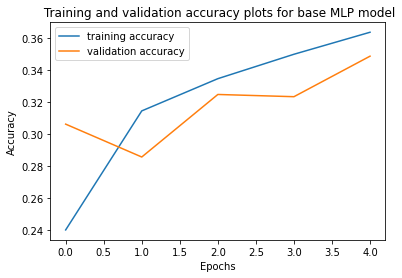

In [153]:
train_accuracy_base_mlp = history_l3_n_512.history['accuracy']
validation_accuracy_base_mlp = history_l3_n_512.history['val_accuracy']

train_cost_base_mlp = history_l3_n_512.history["loss"]
val_cost_base_mlp = history_l3_n_512.history["val_loss"] 

plt.plot(train_accuracy_base_mlp , label="training accuracy")
plt.plot(validation_accuracy_base_mlp, label ="validation accuracy")
plt.title(" Training and validation accuracy plots for base MLP model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

##### Cost Plot for base MLP model

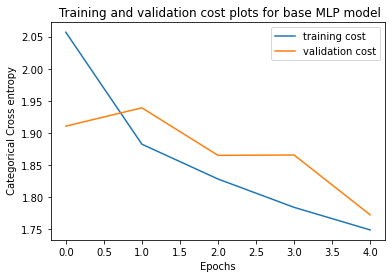

In [154]:
plt.plot(train_cost_base_mlp, label ="training cost")
plt.plot(val_cost_base_mlp, label ="validation cost")
plt.title(" Training and validation cost plots for base MLP model")
plt.xlabel("Epochs")
plt.ylabel(" Categorical Cross entropy")
plt.legend()

#### Training accuarcy plot for all MLP models


In [155]:
# storing the training accuarcies for each model

train_accuracy_0 = history_l3_n_256.history['accuracy']
train_accuracy_1 = history_l3_n_512.history['accuracy']
train_accuracy_2 = history_l3_n_1024.history['accuracy']
train_accuracy_3 = history_l4_n_256.history['accuracy']
train_accuracy_4 = history_l4_n_512.history['accuracy']
train_accuracy_5 = history_l4_n_1024.history['accuracy']
train_accuracy_6 = history_l5_n_256.history['accuracy']
train_accuracy_7 = history_l5_n_512.history['accuracy']
train_accuracy_8 = history_l5_n_1024.history['accuracy']



Text(0, 0.5, ' Training Accuarcy')

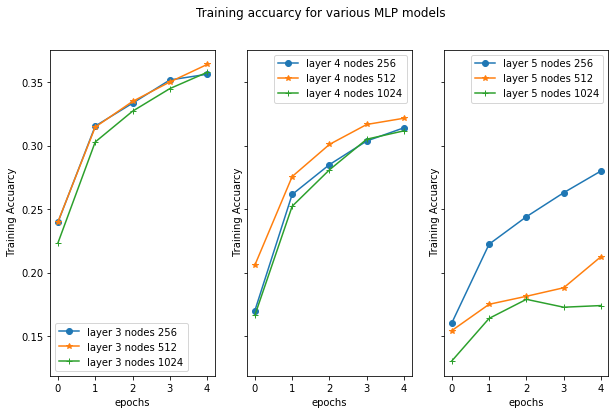

In [156]:
# Plotting subplots for training acccuracy

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize =(10,6), sharey= True, sharex= True)
fig.suptitle('Training accuarcy for various MLP models')


ax1.plot(train_accuracy_0,"-o",label ="layer 3 nodes 256")
ax1.plot(train_accuracy_1,"-*",label ="layer 3 nodes 512")
ax1.plot(train_accuracy_2,"-+",label ="layer 3 nodes 1024")
ax1.legend(loc='best')
ax1.set_xlabel("epochs")
ax1.set_ylabel(" Training Accuarcy")


ax2.plot(train_accuracy_3,"-o",label ="layer 4 nodes 256")
ax2.plot(train_accuracy_4,"-*",label ="layer 4 nodes 512")
ax2.plot(train_accuracy_5,"-+",label ="layer 4 nodes 1024")
ax2.legend(loc='best')
ax2.set_xlabel("epochs")
ax2.set_ylabel(" Training Accuarcy")


ax3.plot(train_accuracy_6,"-o",label ="layer 5 nodes 256")
ax3.plot(train_accuracy_7,"-*",label ="layer 5 nodes 512")
ax3.plot(train_accuracy_8,"-+",label ="layer 5 nodes 1024")
ax3.legend(loc='best')
ax3.set_xlabel("epochs")
ax3.set_ylabel(" Training Accuarcy")


#### Validation accuarcy plot for all MLP models


In [157]:
# storing the validation accuarcies for each model

val_accuracy_0 = history_l3_n_256.history['val_accuracy']
val_accuracy_1 = history_l3_n_512.history['val_accuracy']
val_accuracy_2 = history_l3_n_1024.history['val_accuracy']
val_accuracy_3 = history_l4_n_256.history['val_accuracy']
val_accuracy_4 = history_l4_n_512.history['val_accuracy']
val_accuracy_5 = history_l4_n_1024.history['val_accuracy']
val_accuracy_6 = history_l5_n_256.history['val_accuracy']
val_accuracy_7 = history_l5_n_512.history['val_accuracy']
val_accuracy_8 = history_l5_n_1024.history['val_accuracy']



Text(0, 0.5, ' Validation Accuarcy')

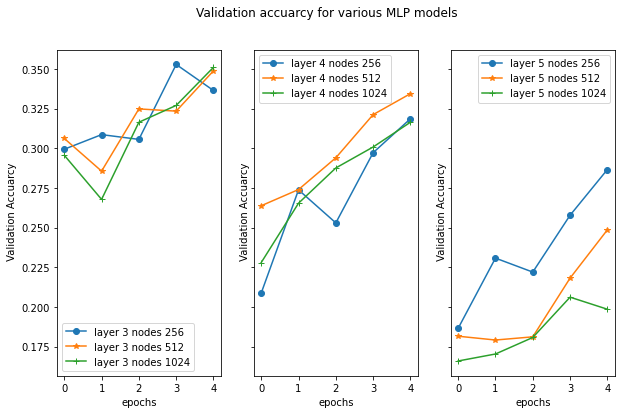

In [158]:
# Plotting subplots for validation acccuracy

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize =(10,6), sharey= True, sharex= True)
fig.suptitle('Validation accuarcy for various MLP models')


ax1.plot(val_accuracy_0,"-o",label ="layer 3 nodes 256")
ax1.plot(val_accuracy_1,"-*",label ="layer 3 nodes 512")
ax1.plot(val_accuracy_2,"-+",label ="layer 3 nodes 1024")
ax1.legend(loc='best')
ax1.set_xlabel("epochs")
ax1.set_ylabel(" Validation Accuarcy")


ax2.plot(val_accuracy_3,"-o",label ="layer 4 nodes 256")
ax2.plot(val_accuracy_4,"-*",label ="layer 4 nodes 512")
ax2.plot(val_accuracy_5,"-+",label ="layer 4 nodes 1024")
ax2.legend(loc='best')
ax2.set_xlabel("epochs")
ax2.set_ylabel(" Validation Accuarcy")


ax3.plot(val_accuracy_6,"-o",label ="layer 5 nodes 256")
ax3.plot(val_accuracy_7,"-*",label ="layer 5 nodes 512")
ax3.plot(val_accuracy_8,"-+",label ="layer 5 nodes 1024")
ax3.legend(loc='best')
ax3.set_xlabel("epochs")
ax3.set_ylabel(" Validation Accuarcy")


### Train and Validation plots for CNN model1

#### Accuracy plots for CNN1 model

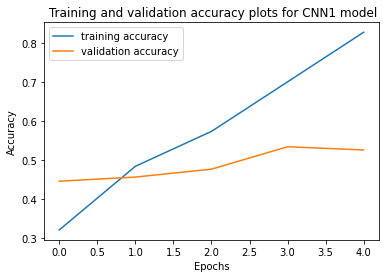

In [159]:
train_accuracy_cnn1 = history_cnn1.history['accuracy']
validation_accuracy_cnn1 = history_cnn1.history['val_accuracy']

train_cost_cnn1 = history_cnn1.history["loss"]
val_cost_cnn1 = history_cnn1.history["val_loss"] 


plt.plot(train_accuracy_cnn1, label ="training accuracy")
plt.plot(validation_accuracy_cnn1, label ="validation accuracy")
plt.title(" Training and validation accuracy plots for CNN1 model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### Cost Plots for CNN1 model

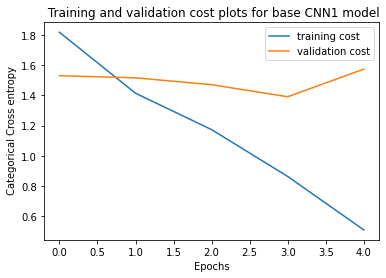

In [160]:
plt.plot(train_cost_cnn1, label ="training cost")
plt.plot(val_cost_cnn1, label ="validation cost")
plt.title(" Training and validation cost plots for base CNN1 model")
plt.xlabel("Epochs")
plt.ylabel(" Categorical Cross entropy")
plt.legend()

### Train and Validation plots for CNN model2

#### Accuracy plots for CNN2 model

In [161]:
train_accuracy_cnn2 = history_model_cnn2 .history['accuracy']
validation_accuracy_cnn2 =history_model_cnn2 .history['val_accuracy']

train_cost_cnn2 = history_model_cnn2 .history["loss"]
val_cost_cnn2 = history_model_cnn2 .history["val_loss"] 

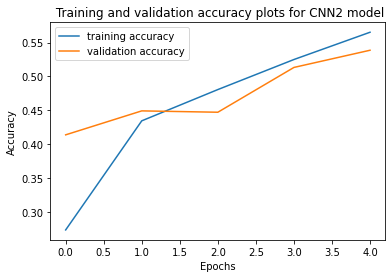

In [162]:
plt.plot(train_accuracy_cnn2, label ="training accuracy")
plt.plot(validation_accuracy_cnn2, label ="validation accuracy")
plt.title(" Training and validation accuracy plots for CNN2 model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### Cost Plots for CNN2 model

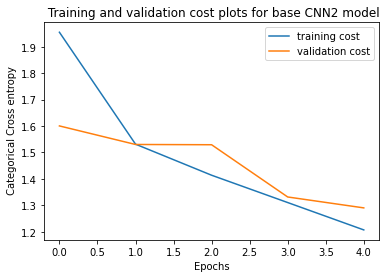

In [163]:
plt.plot(train_cost_cnn2, label ="training cost")
plt.plot(val_cost_cnn2, label ="validation cost")
plt.title(" Training and validation cost plots for base CNN2 model")
plt.xlabel("Epochs")
plt.ylabel(" Categorical Cross entropy")
plt.legend()

## Calculating test set accuarcies for base MLP and CNN models

### test set performance of base MLP model

In [164]:
# predicting model performance
y_pred = model.predict(x_test)

# mapping max probabibilities to corresponding classes
y_pred_one_hot = np.zeros(y_pred.shape)
for i in range(len(y_pred)):
  temp = np.argmax(y_pred[i,:])
  y_pred_one_hot[i,temp]=1

# comparing the output with actual output
corr=0
for i in range(y_test_p.shape[0]):
    temp1 = np.argmax(y_test_p[i,:])
    temp2 = np.argmax(y_pred_one_hot[i,:])
    if(temp1 == temp2):
      corr= corr+1

test_accuracy = corr/y_pred_one_hot.shape[0]
print(f"test set accuarcy for base model is {test_accuracy}")

test set accuarcy for base model is 0.3406


### test set performance of CNN1 Model

In [165]:
# predicting model performance
y_pred = model_cnn1.predict(x_test)
y_pred_one_hot = np.zeros(y_pred.shape)

# mapping max probabibilities to corresponding classes
for i in range(len(y_pred)):
  temp = np.argmax(y_pred[i,:])
  y_pred_one_hot[i,temp]=1

# comparing the output with actual output
corr=0
for i in range(y_test_p.shape[0]):
    temp1 = np.argmax(y_test_p[i,:])
    temp2 = np.argmax(y_pred_one_hot[i,:])
    if(temp1 == temp2):
      corr= corr+1

test_accuracy = corr/y_pred_one_hot.shape[0]

print(f"test set accuarcy for CNN1 model is {test_accuracy}")


test set accuarcy for CNN1 model is 0.4454


### test set performance of CNN2 Model

In [166]:
# predicting model performance
y_pred = model_cnn2.predict(x_test)
y_pred_one_hot = np.zeros(y_pred.shape)

# mapping max probabibilities to corresponding classes
for i in range(len(y_pred)):
  temp = np.argmax(y_pred[i,:])
  y_pred_one_hot[i,temp]=1

# comparing the output with actual output
corr=0
for i in range(y_test_p.shape[0]):
    temp1 = np.argmax(y_test_p[i,:])
    temp2 = np.argmax(y_pred_one_hot[i,:])
    if(temp1 == temp2):
      corr= corr+1

test_accuracy = corr/y_pred_one_hot.shape[0]
print(f"test set accuarcy for CNN2 model is {test_accuracy}")

test set accuarcy for CNN2 model is 0.4346
